<a href="https://colab.research.google.com/github/Git34Smakin/codez/blob/main/Crop_Recommendation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: SSEMAKULA JULIUS



# Capstone Project: AI-Powered Crop Recommendation System

Student Name: SSEMAKULA JULIUS  
Dataset:`crop_recommendation.csv`

In [7]:
# upload the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#import all libraries
# Data Manipulation
import pandas as pd
import numpy as np
import io  # Needed if you used direct upload

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')

# Print a success message
print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [9]:
#test the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/crop_recommendation.csv')
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [10]:
# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/dataset/crop_recommendation.csv')
print("Dataset loaded successfully from Google Drive!")

Dataset loaded successfully from Google Drive!


## Step 1: Problem Identification

### 1.1 Problem Statement
The problem is to build a predictive model that can recommend the most suitable crop to cultivate based on a given set of agro-climatic conditions (such as nitrogen levels, rainfall, temperature, humidity).

### 1.2 Relevance and Importance
*   **Increased Yield and Profitability:** Recommending the right crop for specific conditions can significantly increase yield and farmer income.
*   **Resource Optimization:** It helps in the efficient use of resources like water and fertilizers, promoting sustainable farming practices.
*   **Adaptation to Climate Change:** As weather patterns become more unpredictable, data-driven recommendations can help farmers adapt and make resilient choices.
*   **Support for New Farmers:** This system can serve as an expert advisory tool for individuals new to farming in a particular region.

In [12]:


# Display the first 5 rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Check the dataset's basic info
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check the balance of the target variable 'label'
print("\nTarget Variable Distribution:")
print(df['label'].value_counts())


First 5 rows of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Target Variable Distribution:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
ba

##Step 2: Data Preprocessing

In [13]:
# Separate features (X) and target variable (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a mapping dictionary to understand which number corresponds to which crop
crop_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Crop Mapping (Number -> Name):")
for number, name in enumerate(label_encoder.classes_):
    print(f"{number}: {name}")

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame
print("\nFirst 5 rows of Scaled Features:")
display(X_scaled_df.head())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Crop Mapping (Number -> Name):
0: apple
1: banana
2: blackgram
3: chickpea
4: coconut
5: coffee
6: cotton
7: grapes
8: jute
9: kidneybeans
10: lentil
11: maize
12: mango
13: mothbeans
14: mungbean
15: muskmelon
16: orange
17: papaya
18: pigeonpeas
19: pomegranate
20: rice
21: watermelon

First 5 rows of Scaled Features:


,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373



Training set shape: (1760, 7)
Testing set shape: (440, 7)


 ##Step 3: Exploratory Data Analysis (EDA)

In [14]:
# Statistical Summary
print("Statistical Summary of Numerical Features:")
display(df.describe())

Statistical Summary of Numerical Features:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Histograms of Numerical Features:


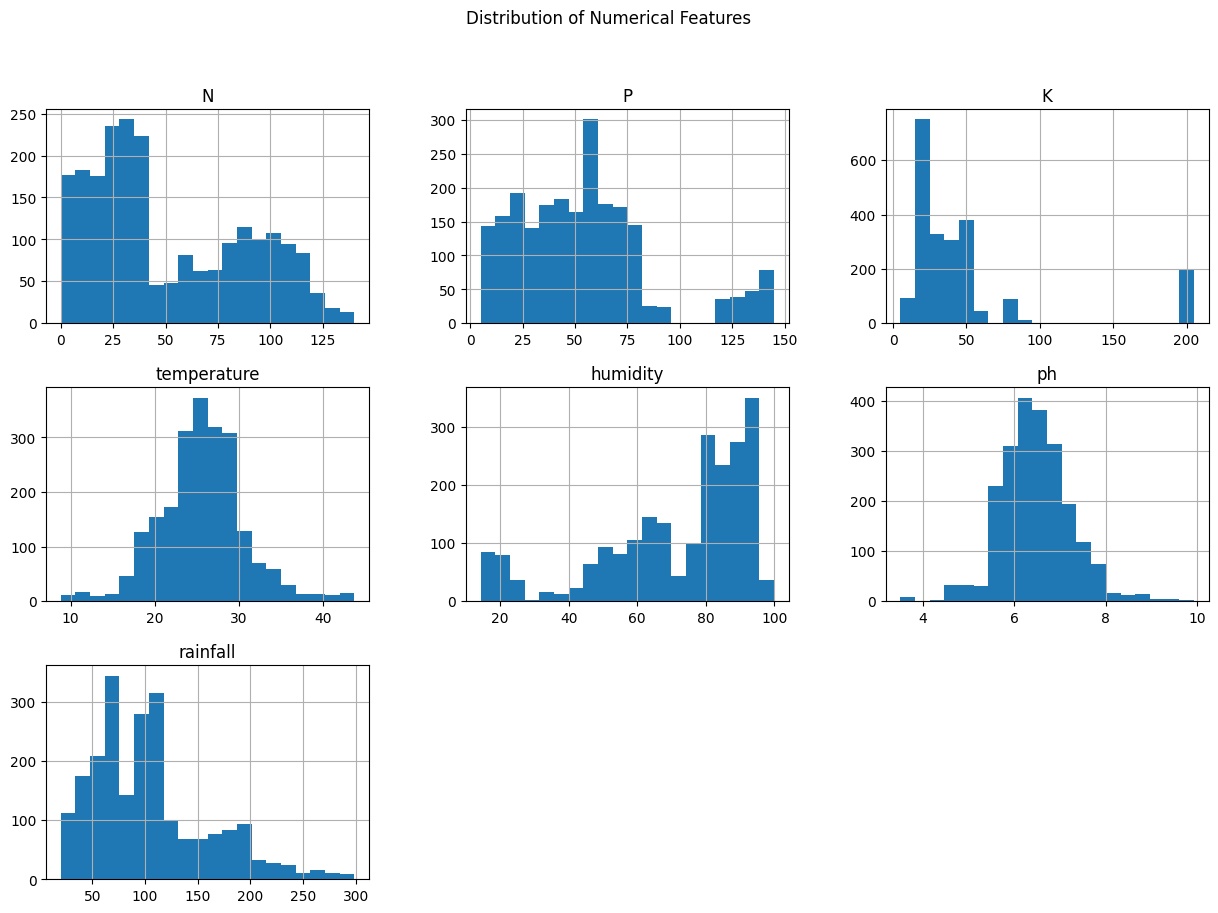

In [15]:
# Distribution of Numerical Features
print("Histograms of Numerical Features:")
df.drop('label', axis=1).hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

Feature Correlation Heatmap:


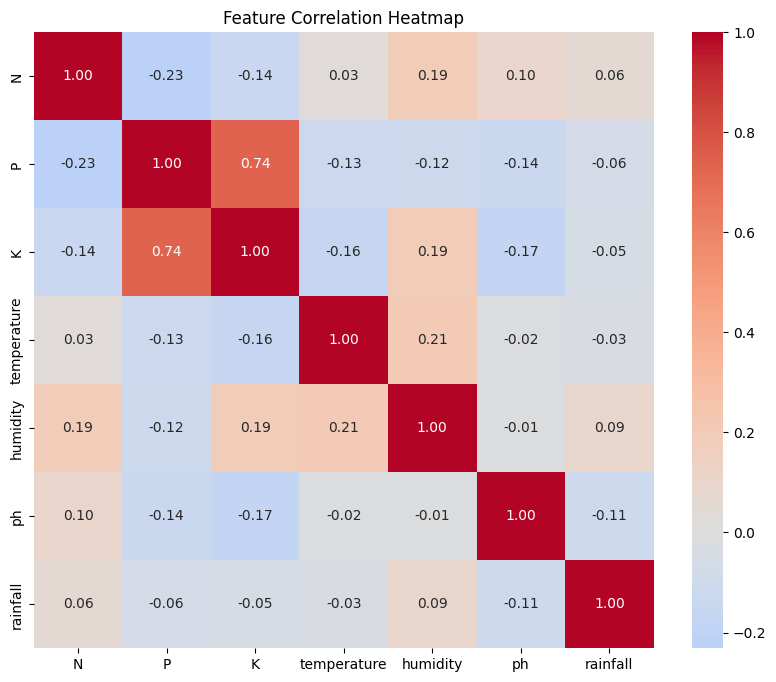

In [16]:
# Correlation Analysis
print("Feature Correlation Heatmap:")
plt.figure(figsize=(10, 8))
corr_matrix = df.drop('label', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Boxplot: Nitrogen (N) Ratio by Crop Type:


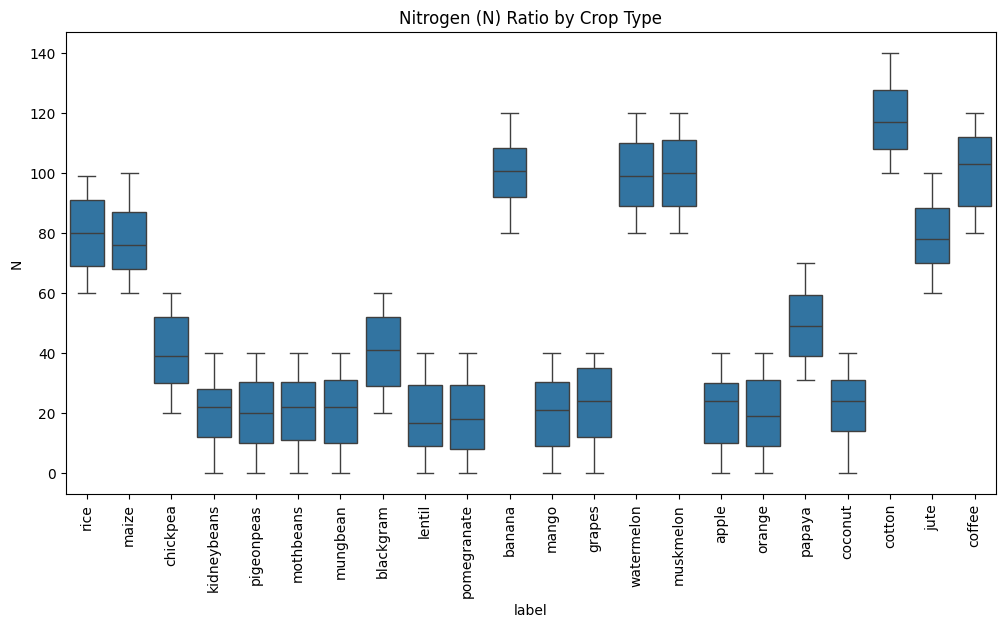

In [18]:
# Boxplot: Nitrogen by Crop
print("Boxplot: Nitrogen (N) Ratio by Crop Type:")
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='N', data=df)
plt.xticks(rotation=90)
plt.title('Nitrogen (N) Ratio by Crop Type')
plt.show()

##Step 4: Model Building

In [19]:
# Initialize the models
print("Training models...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("✅ Model training and prediction complete!")

Training models...
✅ Model training and prediction complete!


## Step 5: Model Evaluation

Random Forest Accuracy: 0.9955

Classification Report for Random Forest:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      o

<Figure size 1200x1000 with 0 Axes>

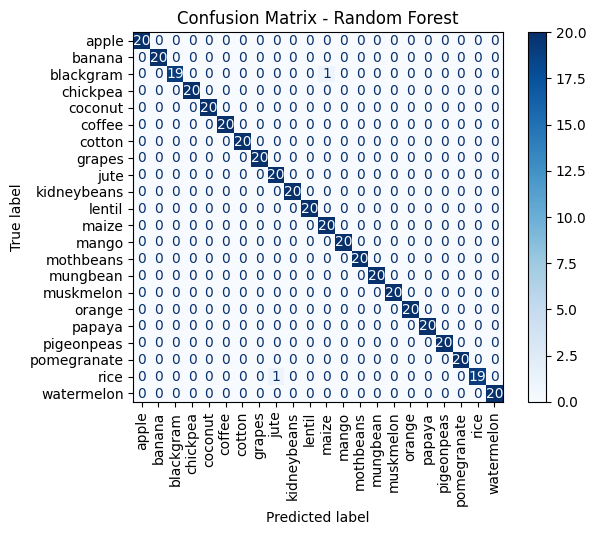

In [20]:
# Calculate Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}\n")

# Classification Report
print("Classification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [21]:
# Calculate Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}\n")

# Classification Report
print("Classification Report for KNN:\n")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

KNN Accuracy: 0.9795

Classification Report for KNN:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.91      1.00      0.95        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.94      0.85      0.89        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00    

In [22]:
# Calculate Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}\n")

# Classification Report
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

Logistic Regression Accuracy: 0.9727

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00      

In [23]:
# Create a simple comparison DataFrame
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'K-Nearest Neighbors', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, knn_accuracy, lr_accuracy]
})

model_comparison_sorted = model_comparison.sort_values(by='Accuracy', ascending=False)
print("Model Performance Comparison:")
display(model_comparison_sorted)

Model Performance Comparison:


,Model,Accuracy
0,Random Forest,0.995455
1,K-Nearest Neighbors,0.979545
2,Logistic Regression,0.972727


## Step 6: Conclusion and Demonstration

Based on the evaluation, the Random Forest model is the best choice for this crop recommendation system due to its superior performance. Let's use it to make a recommendation.

In [24]:
# Let's create a sample input for a new piece of land
# Format: [N, P, K, temperature, humidity, ph, rainfall]
# sample values for 'apple'
new_data = [[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]]

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Use the trained Random Forest model to predict
prediction_encoded = rf_model.predict(new_data_scaled)

# Inverse transform the encoded prediction to get the crop name
predicted_crop = label_encoder.inverse_transform(prediction_encoded)

print(f"The recommended crop for the given conditions is: {predicted_crop[0]}")

The recommended crop for the given conditions is: rice


###  Project summary

This end-to-end data science solution demonstrates the entire workflow for a crop recommendation system:
1.  **Problem Identification:** Defined a relevant agricultural challenge.
2.  **Data Preparation:** Loaded, cleaned, and scaled the data.
3.  **EDA:** Uncovered patterns and relationships in the data.
4.  **Model Building:** Trained and compared multiple machine learning algorithms.
5.  **Model Evaluation:** Selected the best model (Random Forest) based on performance metrics.
6.  **Deployment Readiness:** Demonstrated how to use the model for new predictions.